In [1]:
import csv
import random
from datetime import datetime, timedelta
import json
import pandas as pd
import seaborn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
# Load home world data from JSON file
with open("home_worlds.json") as json_file:
    home_worlds = json.load(json_file)

df = pd.read_csv('troop_movements.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'home_worlds.json'

In [18]:
df["empire_or_resistance"].value_counts()

empire_or_resistance
resistance    508
empire        492
Name: count, dtype: int64

In [19]:
df["homeworld"].value_counts()


homeworld
Zolan           36
Kashyyyk        30
Naboo           30
Shili           28
Vulpter         28
Alderaan        28
Troiken         28
Sullust         28
Skako           27
Mon Cala        27
Iktotch         27
Tund            27
Bestine IV      26
Haruun Kal      26
Glee Anselm     25
Rodia           25
Muunilinst      25
Aleen Minor     24
Umbara          24
Serenno         24
Trandosha       24
Eriadu          24
Tatooine        23
Ojom            23
Malastare       23
Champala        23
Tholoth         22
Iridonia        22
Mirial          22
Dagobah         22
Socorro         22
Corellia        22
Ryloth          21
Concord Dawn    20
Cerea           20
Kalee           19
Quermia         18
Toydaria        18
Stewjon         18
Dathomir        17
Dorin           17
Chandrila       17
Name: count, dtype: int64

In [20]:
df["unit_type"].value_counts()


unit_type
at-at                 160
x-wing                138
unknown               125
resistance_soldier    124
tie_silencer          118
tie_fighter           115
at-st                 112
stormtrooper          108
Name: count, dtype: int64

In [21]:
df['is_resistance'] = df['empire_or_resistance']=='resistance'
df['is_resistance'].head()


0    False
1    False
2     True
3    False
4    False
Name: is_resistance, dtype: bool

[Text(0.5, 0, 'Empire or Resistance')]

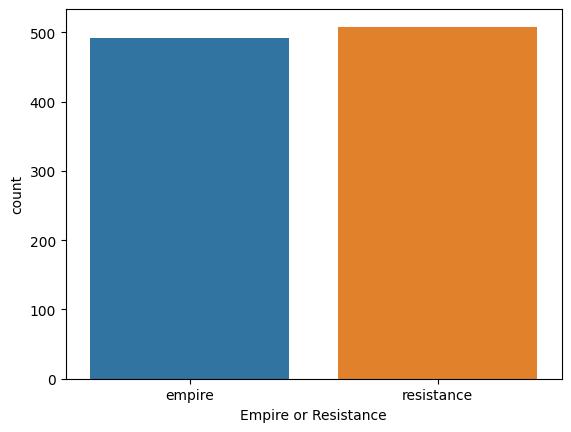

In [22]:
seaborn.countplot(df, x="empire_or_resistance",hue=df['empire_or_resistance']).set(xlabel="Empire or Resistance",)

In [23]:
mod = DecisionTreeClassifier(max_depth=4)
X = pd.get_dummies(df[['homeworld','unit_type']])
print(X.head())
Y= df['empire_or_resistance']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 2)


mod.fit(X_train,y_train)

   homeworld_Alderaan  homeworld_Aleen Minor  homeworld_Bestine IV  \
0               False                  False                 False   
1                True                  False                 False   
2               False                  False                 False   
3               False                  False                 False   
4               False                  False                 False   

   homeworld_Cerea  homeworld_Champala  homeworld_Chandrila  \
0            False               False                False   
1            False               False                False   
2            False               False                False   
3            False               False                False   
4            False               False                False   

   homeworld_Concord Dawn  homeworld_Corellia  homeworld_Dagobah  \
0                   False               False              False   
1                   False               False              False

DecisionTreeClassifier(max_depth=4)

C:\Users\wasadmin\AppData\Local\Temp\2\ipykernel_996\2618416574.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig = seaborn.barplot(fi, x="Feature",y='Importance',hue='Feature').set_xticklabels(X.columns, rotation=90, ha="right", fontsize='x-small')


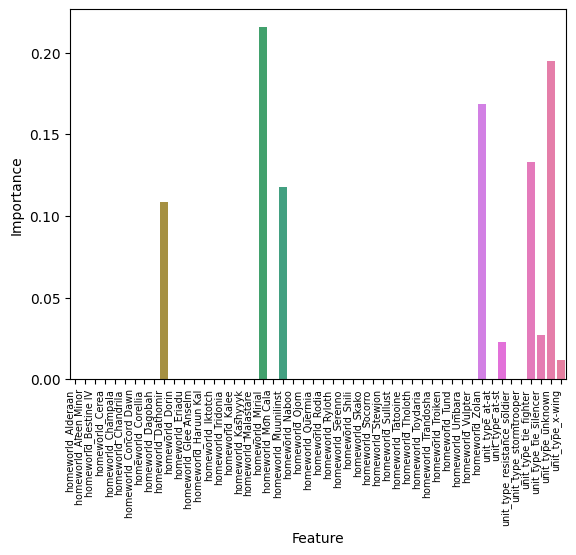

In [24]:
importances = mod.feature_importances_
fi = pd.DataFrame({'Feature':X.columns,'Importance':importances})
fig = seaborn.barplot(fi, x="Feature",y='Importance',hue='Feature').set_xticklabels(X.columns, rotation=90, ha="right", fontsize='x-small')

In [25]:
import pickle

# Specify the file path to save the pipeline
file_path = 'DecTree.pkl'

# Save the pipeline to disk
with open(file_path, 'wb') as file:
    pickle.dump(mod, file)

In [26]:
df10 = pd.read_csv('troop_movements10m.csv')


In [27]:
df10['unit_type'].replace('invalid_unit','unknown',inplace=True)
print(df10.head(50))
#df10.ffill()

C:\Users\wasadmin\AppData\Local\Temp\2\ipykernel_996\392789408.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df10['unit_type'].replace('invalid_unit','unknown',inplace=True)


              timestamp  unit_id           unit_type  location_x  location_y  \
0   2023-06-13 17:33:18        1               at-st         2.0         8.0   
1   2023-06-13 17:33:17        2        tie_silencer         4.0         4.0   
2   2023-06-13 17:33:16        3               at-at         0.0         3.0   
3   2023-06-13 17:33:15        4        tie_silencer         6.0         1.0   
4   2023-06-13 17:33:14        5         tie_fighter         0.0         4.0   
5   2023-06-13 17:33:13        6               at-st         0.0         7.0   
6   2023-06-13 17:33:13        7               at-at         2.0         1.0   
7   2023-06-13 17:33:12        8         tie_fighter         7.0         7.0   
8   2023-06-13 17:33:11        9               at-at         0.0         7.0   
9   2023-06-13 17:33:10       10        stormtrooper         8.0         6.0   
10  2023-06-13 17:33:09       11               at-at         8.0         7.0   
11  2023-06-13 17:33:08       12        

In [28]:
df10.to_parquet('troop_movements10m.parquet')

In [29]:
loaded_model = pickle.load(open(file_path, 'rb'))
result = loaded_model.score(X_test, y_test)

# Reading from a Parquet file
loaded_file = pd.read_parquet('troop_movements10m.parquet')


print(result)

0.45


In [30]:
loaded_file["predictions"] = loaded_model.predict(pd.get_dummies(loaded_file[['unit_type','homeworld']]).sort_index(axis=1))

In [31]:
print(loaded_file.head(50))

              timestamp  unit_id           unit_type  location_x  location_y  \
0   2023-06-13 17:33:18        1               at-st         2.0         8.0   
1   2023-06-13 17:33:17        2        tie_silencer         4.0         4.0   
2   2023-06-13 17:33:16        3               at-at         0.0         3.0   
3   2023-06-13 17:33:15        4        tie_silencer         6.0         1.0   
4   2023-06-13 17:33:14        5         tie_fighter         0.0         4.0   
5   2023-06-13 17:33:13        6               at-st         0.0         7.0   
6   2023-06-13 17:33:13        7               at-at         2.0         1.0   
7   2023-06-13 17:33:12        8         tie_fighter         7.0         7.0   
8   2023-06-13 17:33:11        9               at-at         0.0         7.0   
9   2023-06-13 17:33:10       10        stormtrooper         8.0         6.0   
10  2023-06-13 17:33:09       11               at-at         8.0         7.0   
11  2023-06-13 17:33:08       12        